# Customer Churn_Telecom Project

# Problem Statement

* Companies usually have a greater focus on customer acquisition and keep retention as a  secondary priority. However, it can cost five times more to attract a new customer than it does to  retain an existing one. Increasing customer retention rates by 5% can increase profits by 25% to  95%, according to research done by Bain & Company.


## Import Necessary Libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, balanced_accuracy_score, plot_confusion_matrix, roc_auc_score, recall_score, precision_score 
from sklearn.feature_selection import RFE, SelectFromModel

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

from imblearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn import set_config
set_config(display="diagram")  # make pipeline visible

from pickle import dump
from pickle import load


import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
data = pd.read_csv('Telecom-Churn.csv', )
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## EDA

### Data understanding & checking missing/null values

In [3]:
# Checking the size of dataset
print('=============================')
print('Shape: ', data.shape)
print('=============================\n')

Shape:  (7043, 21)



In [4]:
#Summarizing the overall dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#dropping the unnecessary columns 
data.drop(['customerID', 'StreamingMovies'], axis=1, inplace=True)

#### Streaming movies is removed as it will lead to multi-collinearity problem due to existence of Streaming TV

In [6]:
#Checking the duplicate data
data[data.duplicated()].shape

(22, 19)

In [7]:
#Dropping the duplicate values
data.drop_duplicates(inplace=True)

In [8]:
#Statistical description of categorical data
data.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,3853,4161,2359,11,5164


In [9]:
#Statistical description of numerical data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [10]:
#Rechecking the shape of dataset
data.shape

(7021, 19)

In [11]:
#Rechecking the summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  Contract          7021 non-null   object 
 14  PaperlessBilling  7021 non-null   object 
 15  PaymentMethod     7021 non-null   object 
 16  MonthlyCharges    7021 non-null   float64


#### From above summary, 
* TotalCharges feature found to be of 'object datatype. Let's focus on it first! 

In [12]:
#Checking the min value of column - TotalCharges
data.TotalCharges.min()

' '

In [13]:
#Changing the datatype of column TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [14]:
#Rechecking the datatype
data.TotalCharges.dtype

dtype('float64')

In [15]:
#Rechecking any null values persists
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
#Checking the nan values w.r.t churn
data[data['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Two year,No,Mailed check,73.35,NaN,No


In [17]:
#dropping the original TotalCharges column
data.dropna(inplace=True)

In [18]:
#Rechecking the dataset after cleaning
data.shape

(7010, 19)

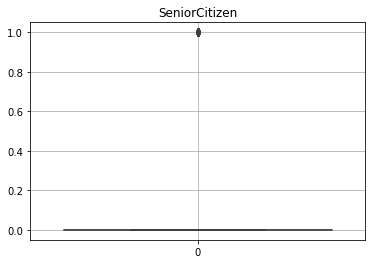

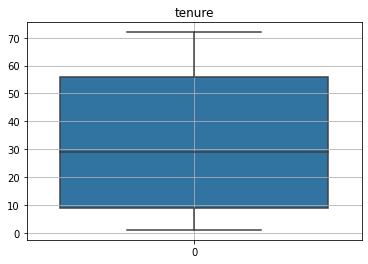

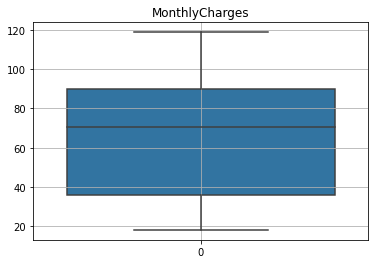

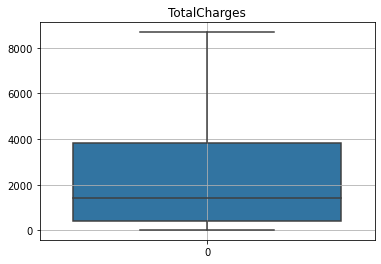

In [19]:
##Checkig for the outliers in dataset
coln = data.columns[data.dtypes!="object"]

for i in coln:
    sns.boxplot(data=data[i])
    plt.grid()
    plt.title(i)
    plt.show()

In [20]:
#Exploring the feature with outlier
data.SeniorCitizen.value_counts()

0    5869
1    1141
Name: SeniorCitizen, dtype: int64

#### From above visual, 
* We can say that Senior Citizen feature has only two unique values, hence 1 is misrepresented as outlier. But, in reality it is not!! 

In [21]:
#Checking the columns of dataset
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
#Taking out the categorical columns from dataset
cols = data.columns[data.dtypes=='object']

In [23]:
#Checking the unique values for categorical column
for i in cols:
    print('===================================================')
    uq = data[i].unique()
    print(i, '\n',uq)
    print('===================================================\n')

gender 
 ['Female' 'Male']

Partner 
 ['Yes' 'No']

Dependents 
 ['No' 'Yes']

PhoneService 
 ['No' 'Yes']

MultipleLines 
 ['No phone service' 'No' 'Yes']

InternetService 
 ['DSL' 'Fiber optic' 'No']

OnlineSecurity 
 ['No' 'Yes' 'No internet service']

OnlineBackup 
 ['Yes' 'No' 'No internet service']

DeviceProtection 
 ['No' 'Yes' 'No internet service']

TechSupport 
 ['No' 'Yes' 'No internet service']

StreamingTV 
 ['No' 'Yes' 'No internet service']

Contract 
 ['Month-to-month' 'One year' 'Two year']

PaperlessBilling 
 ['Yes' 'No']

PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn 
 ['No' 'Yes']



In [24]:
#Count of the unique values for categorical columns
for i in cols:
    print('=================================')
    un = data[i].value_counts()
    print(i, '\n\n',un)
    print('=================================\n')

gender 

 Male      3535
Female    3475
Name: gender, dtype: int64

Partner 

 No     3617
Yes    3393
Name: Partner, dtype: int64

Dependents 

 No     4911
Yes    2099
Name: Dependents, dtype: int64

PhoneService 

 Yes    6330
No      680
Name: PhoneService, dtype: int64

MultipleLines 

 No                  3363
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

InternetService 

 Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64

OnlineSecurity 

 No                     3489
Yes                    2015
No internet service    1506
Name: OnlineSecurity, dtype: int64

OnlineBackup 

 No                     3079
Yes                    2425
No internet service    1506
Name: OnlineBackup, dtype: int64

DeviceProtection 

 No                     3086
Yes                    2418
No internet service    1506
Name: DeviceProtection, dtype: int64

TechSupport 

 No                     3464
Yes                    2

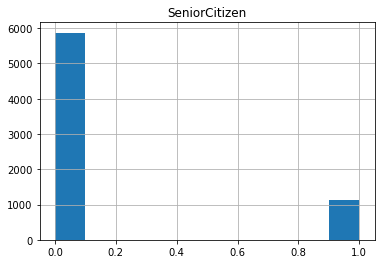

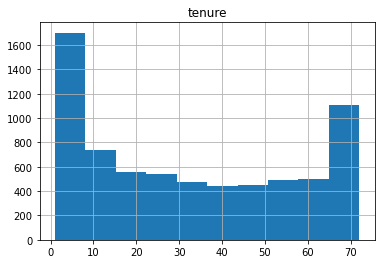

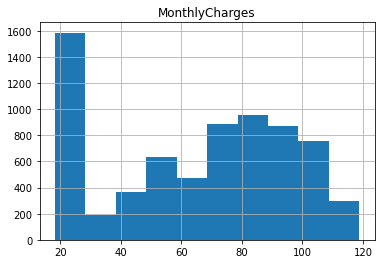

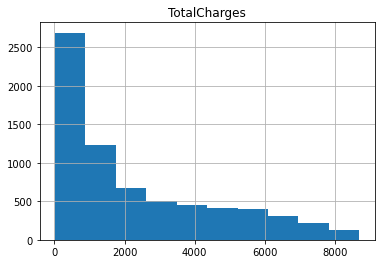

In [25]:
#Checking the distribution of data
col = data.columns[data.dtypes!='object']
for i in col:
    data.hist(i)
    plt.title(i)
    plt.grid()
    plt.grid() 

#### Note:
* In above steps, we have successfully removed the unnecessary columns, duplicate data, dropped null values from dataset.
* We have also transformed Total Charges feature, and also checked the present of outliers and unique values, distribution of data etc.  

### Data Visualization & Drawing Inference

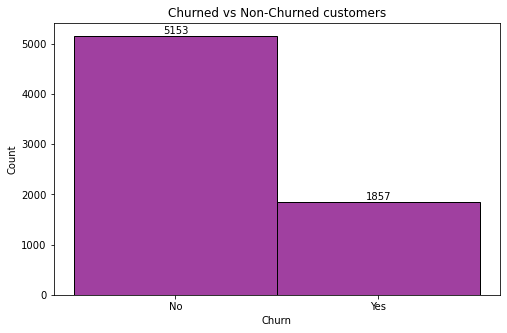

In [26]:
#Visualising the target variable - customer churn
plt.figure(figsize=(8,5))
ax = sns.histplot(data['Churn'], color=['purple'], edgecolor='black')
plt.title('Churned vs Non-Churned customers')
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, 
* We can say that count of 'NO' (Not Churned) is approx., 2.78 times greater  than 'YES' (Churned) variable. 
* Hence, dataset is highly imbalanced dataset.

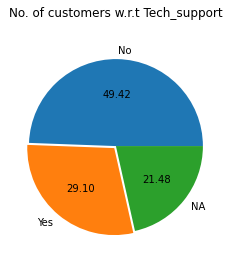

Tech_Support:
 No                     3464
Yes                    2040
No internet service    1506
Name: TechSupport, dtype: int64


In [27]:
#Visualizing how many customer took tech support & churned
data1 = data['TechSupport'].value_counts()
ax = plt.pie(data1, labels=['No', 'Yes', 'NA'], autopct='%0.2f', explode=[0.0, 0.03, 0.0])
plt.title('No. of customers w.r.t Tech_support\n')
plt.show()
print('Tech_Support:\n',data1)

In [28]:
#Checking how many customers who took tech_support have churned 
data[(data['Churn']=='Yes') & (data['TechSupport']=='Yes')].value_counts(data['Churn']=='Yes')

Churn
True    310
dtype: int64

In [29]:
#Checking the no. of customers churned without taking the tech-support service
data[(data['Churn']=='Yes') & (data['TechSupport']=='No')].value_counts(data['Churn']=='Yes')

Churn
True    1438
dtype: int64

#### From above visual & analysis,
* We can say that approx., 50% (3464) customers have not applied for tech support out of which 42% (1438) have churned/exited.


* Around 30% (2040) customers took the service of tech support out of which only 15% (310) have churned/exited.

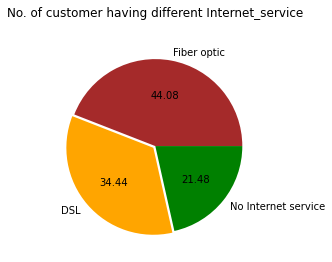

Internet_Service:
 Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64


In [30]:
##Visualizing how many customer with Internet Service have/not churned
plt.pie(data['InternetService'].value_counts(), labels=['Fiber optic', 'DSL', 'No Internet service'], 
        autopct='%0.2f', explode=[0.0, 0.03, 0.0], colors=['brown', 'orange', 'green'])
plt.title('No. of customer having different Internet_service\n')
plt.show()
print('Internet_Service:\n',data['InternetService'].value_counts())

In [31]:
#Checking how many customers who opted for fibre optic have churned 
data[(data['Churn']=='Yes') & (data['InternetService']=='Fiber optic')].value_counts(data['Churn']=='Yes')

Churn
True    1291
dtype: int64

In [32]:
#Checking the no. of customers churned without taking the internet service
data[(data['Churn']=='Yes') & (data['InternetService']=='No')].value_counts(data['Churn']=='Yes')

Churn
True    109
dtype: int64

In [33]:
#Checking the no. of customers churned with DSL service
data[(data['Churn']=='Yes') & (data['InternetService']=='DSL')].value_counts(data['Churn']=='Yes')

Churn
True    457
dtype: int64

#### From above visuals & analysis,
* Around 44% customers (3090) have opted for fiber optic service, followed by approx., 34% customers (2414) have opted for DSL service, and remaining have not opted to any Internet services.  


* It is observed that customers with no Internet service have churned less compared to customers opted for either of Internet services.

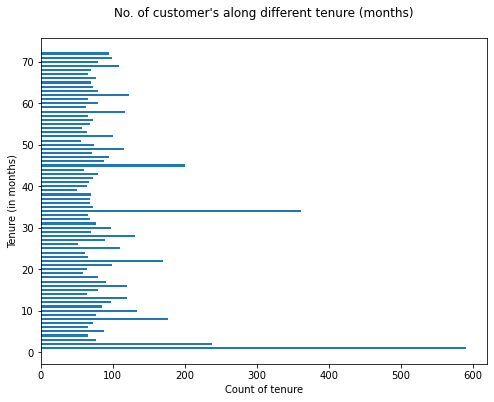

In [34]:
#Checking the no. of customer's among different tenure distribution
plt.figure(figsize=(8,6))
plt.barh(width=data['tenure'].value_counts(), y=data['tenure'].unique(), height=0.5)
plt.title("No. of customer's along different tenure (months)\n")
plt.xlabel('Count of tenure')
plt.ylabel('Tenure (in months)')
plt.show()

In [35]:
#Checking the count of customers with tenure less than 30 months
len(data[(data['tenure']<=30)]['tenure'])

3608

In [36]:
#Checking the no. of customers churned having tenure less than 30 months
data[(data['tenure']<=30) & (data['Churn']=='Yes')].value_counts(data['Churn']=='Yes')

Churn
True    1413
dtype: int64

In [37]:
#Checking the count of customers with tenure greater than 30 months
len(data[(data['tenure']>30)]['tenure'])

3402

In [38]:
#Checking the no. of customers churned having tenure greater than 30 months
data[(data['tenure']>30) & (data['Churn']=='Yes')].value_counts(data['Churn']=='Yes')

Churn
True    444
dtype: int64

#### From above visuals & analysis,
* Around 52% customers (3608) have tenure less than 30 months; out of which approx., 40% customers (1413) have churned.  


* It is found that customers with tenure greater than 30 months have churned less (13%) compared to customers with tenure of more than 30 months (40%).

## Data Preprocessing

In [39]:
data1 = data.copy()

### Label encoding

In [40]:
data1[cols] = data1[cols].apply(LabelEncoder().fit_transform)

In [41]:
#Re-checking the datatype for all columns
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int32  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int32  
 3   Dependents        7010 non-null   int32  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int32  
 6   MultipleLines     7010 non-null   int32  
 7   InternetService   7010 non-null   int32  
 8   OnlineSecurity    7010 non-null   int32  
 9   OnlineBackup      7010 non-null   int32  
 10  DeviceProtection  7010 non-null   int32  
 11  TechSupport       7010 non-null   int32  
 12  StreamingTV       7010 non-null   int32  
 13  Contract          7010 non-null   int32  
 14  PaperlessBilling  7010 non-null   int32  
 15  PaymentMethod     7010 non-null   int32  
 16  MonthlyCharges    7010 non-null   float64


## Model  Building

### Building Base Models with default parameters & all 18 features

In [42]:
#Splitting the variables into features & target
X = data1.iloc[:, :-1]
y = data1[['Churn']]

In [43]:
#Splitting data into training and testing dataset with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=0)

In [44]:
#Building the different classification models with default parameters
dt_mod  = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0, ccp_alpha=0.0, min_samples_split=2)
rf_mod  = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, random_state=0, ccp_alpha=0.0)
knn_mod = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
svm_mod = SVC(kernel='rbf', random_state=0)
xgb_mod = XGBClassifier(n_estimators=100, random_state=0)

### Model Training with above base models

In [45]:
%%time
dt_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
knn_mod.fit(X_train, y_train)
svm_mod.fit(X_train, y_train)
xgb_mod.fit(X_train, y_train)

CPU times: total: 3.56 s
Wall time: 2.07 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model Testing & Evaluation

In [46]:
%%time
y_pred_dt  = dt_mod.predict(X_test)
y_pred_rf  = rf_mod.predict(X_test)
y_pred_knn = knn_mod.predict(X_test)
y_pred_svm = svm_mod.predict(X_test)
y_pred_xgb = xgb_mod.predict(X_test)

CPU times: total: 2.05 s
Wall time: 1.03 s


### Analysing the model performance & accuracy 

In [47]:
#Testing the roc-auc score for all models
cc = [y_pred_dt, y_pred_rf, y_pred_knn, y_pred_svm, y_pred_xgb]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

print('ROC-AUC score for all models')

for i,j in zip(cc, mm):
    print('\n====================================')
    print(j, ':', roc_auc_score(y_test, i).round(3))
    print('====================================', '\n')

ROC-AUC score for all models

Decision Tree : 0.653


Random Forest : 0.685


KNN : 0.665


SVM : 0.5


XGB : 0.704



Confusion Matrix for all models


Decision Tree


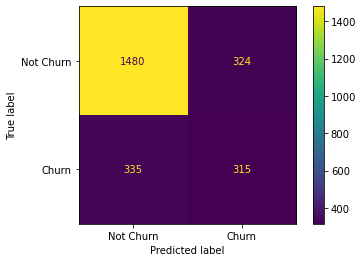



Random Forest


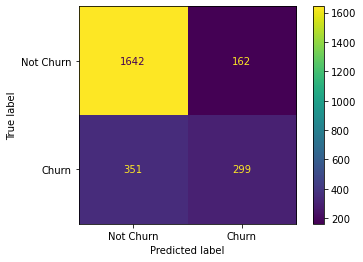



KNN


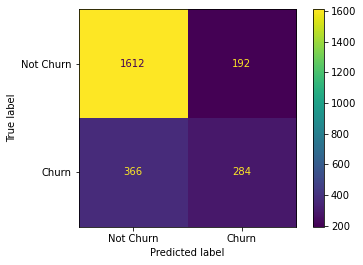



SVM


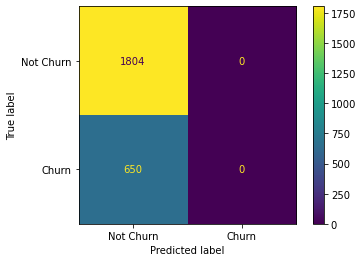



XGB


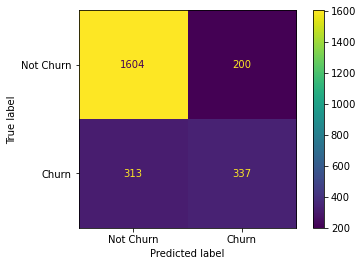

In [48]:
#Plotting Confusion Matrix for all models
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']
dd = [dt_mod, rf_mod, knn_mod, svm_mod, xgb_mod]

print('Confusion Matrix for all models')

for i,j in zip(dd, mm):
    print('\n','========================================', '\n')
    print(j)
    plot_confusion_matrix(i, X_test, y_test, display_labels= ['Not Churn', 'Churn'])   
    plt.show()

In [49]:
#Classification Report for all models
cc = [y_pred_dt, y_pred_rf, y_pred_knn, y_pred_svm, y_pred_xgb]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

for i,j in zip(cc, mm):
    print('======================================================')
    print(j, '\n', classification_report(y_test, i))
    print('======================================================', '\n')

Decision Tree 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1804
           1       0.49      0.48      0.49       650

    accuracy                           0.73      2454
   macro avg       0.65      0.65      0.65      2454
weighted avg       0.73      0.73      0.73      2454


Random Forest 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1804
           1       0.65      0.46      0.54       650

    accuracy                           0.79      2454
   macro avg       0.74      0.69      0.70      2454
weighted avg       0.78      0.79      0.78      2454


KNN 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1804
           1       0.60      0.44      0.50       650

    accuracy                           0.77      2454
   macro avg       0.71      0.67      0.68      2454
weighted avg       0.76      0.77 

#### From above model evaluation,
* As per confusion matrix, our goal is minimise the False Negatives. Hence, except Support Vector Machine all models was able to predict False Negatives but still we have to reduce it as much possible.
* As per classification report, we would try to maximise recall class 1. Except, SVM model, all model's recall value for class 1 is good but low. 

#### Note:
*As the dataset is highly imbalance, we will try to balance the dataset by applying various sampling techniques:*
* SMOTE
* ADASYN
* SMOTE TOMEK

## Sampling Techniques

###  SMOTE: Synthetic Minority Over-sampling Technique 
* SMOTE works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two. It is pretty liberal about selecting the minority points and may end up picking up minority points that are outliers.

In [50]:
#Object Instantiation
sm = SMOTE(random_state=0)

In [51]:
#Resampling the dataset with smote
X_res, y_res = sm.fit_resample(X, y)

In [52]:
#Rechecking the count of target variable after smote
print('X_res after resampling shape : ' , X_res.shape)
print('y_res after resampling shape : ' , y_res.shape, '\n')
print(y_res.value_counts())

X_res after resampling shape :  (10306, 18)
y_res after resampling shape :  (10306, 1) 

Churn
0        5153
1        5153
dtype: int64


#### Building models with balanced data (smote_resampled data)

In [53]:
#Splitting data into training and testing dataset with 80:20 ratio
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state=0, test_size=0.35, stratify=y_res)

In [54]:
#Checking the size of features
X_train_res.shape, X_test_res.shape

((6698, 18), (3608, 18))

#### Model Building with default parameters & smote_resampled data

In [55]:
dt_mod2  = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
rf_mod2  = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=0)
knn_mod2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
svm_mod2 = SVC(C=1.0, random_state=0)
xgb_mod2 = XGBClassifier(n_estimators=100, random_state=0)

#### Model Training

In [56]:
%%time
dt_mod2.fit(X_train_res, y_train_res)
rf_mod2.fit(X_train_res, y_train_res)
knn_mod2.fit(X_train_res, y_train_res)
svm_mod2.fit(X_train_res, y_train_res)
xgb_mod2.fit(X_train_res, y_train_res)

CPU times: total: 6.2 s
Wall time: 3.9 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Model Testing & Evaluation

In [57]:
%%time
y_pred_dt2  = dt_mod2.predict(X_test_res)
y_pred_rf2  = rf_mod2.predict(X_test_res)
y_pred_knn2 = knn_mod2.predict(X_test_res)
y_pred_svm2 = svm_mod2.predict(X_test_res)
y_pred_xgb2 = xgb_mod2.predict(X_test_res)

CPU times: total: 3.5 s
Wall time: 2.87 s


In [58]:
#Testing the roc-auc score for all models
cc = [y_pred_dt2, y_pred_rf2, y_pred_knn2, y_pred_svm2, y_pred_xgb2]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

print('ROC-AUC score for all models')

for i,j in zip(cc, mm):
    print('\n====================================')
    print(j, ':', roc_auc_score(y_test_res, i).round(2))
    print('====================================', '\n')

ROC-AUC score for all models

Decision Tree : 0.78


Random Forest : 0.84


KNN : 0.77


SVM : 0.65


XGB : 0.84



Confusion Matrix for all models


Decision Tree


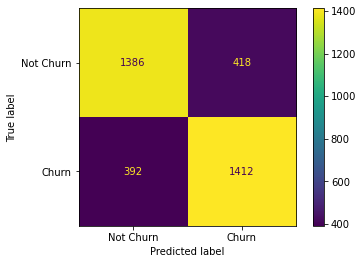



Random Forest


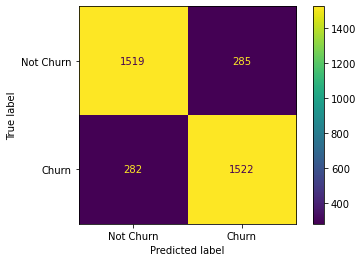



KNN


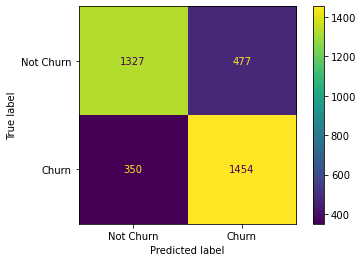



SVM


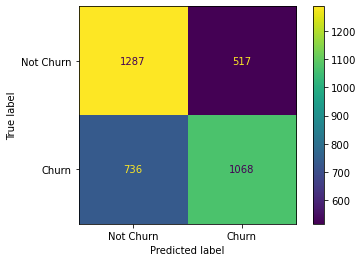



XGB


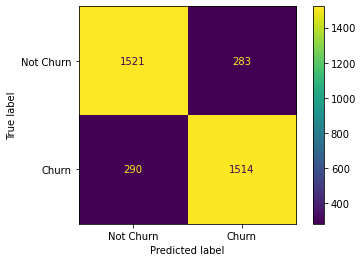

In [59]:
#Plotting Confusion Matrix for all models
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']
dd = [dt_mod2 ,rf_mod2, knn_mod2, svm_mod2, xgb_mod2]

print('Confusion Matrix for all models')

for i,j in zip(dd, mm):
    print('\n','========================================', '\n')
    print(j)
    plot_confusion_matrix(i, X_test_res, y_test_res, display_labels= ['Not Churn', 'Churn'])   
    plt.show()

In [60]:
#Classification Report for all models
cc = [y_pred_dt2, y_pred_rf2, y_pred_knn2, y_pred_svm2, y_pred_xgb2]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

for i,j in zip(cc, mm):
    print('======================================================')
    print(j, '\n', classification_report(y_test_res, i))
    print('======================================================', '\n')

Decision Tree 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1804
           1       0.77      0.78      0.78      1804

    accuracy                           0.78      3608
   macro avg       0.78      0.78      0.78      3608
weighted avg       0.78      0.78      0.78      3608


Random Forest 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1804
           1       0.84      0.84      0.84      1804

    accuracy                           0.84      3608
   macro avg       0.84      0.84      0.84      3608
weighted avg       0.84      0.84      0.84      3608


KNN 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      1804
           1       0.75      0.81      0.78      1804

    accuracy                           0.77      3608
   macro avg       0.77      0.77      0.77      3608
weighted avg       0.77      0.77 

In [61]:
#Comparing the models imbalance & model smote_balance data with balanced accuracy score
mod_comp = pd.DataFrame(index=mm, columns=['Model1', 'Model2'], data={'Model1': [balanced_accuracy_score(y_test ,y_pred_dt).round(2), balanced_accuracy_score(y_test ,y_pred_rf).round(2), balanced_accuracy_score(y_test ,y_pred_knn).round(2), balanced_accuracy_score(y_test ,y_pred_svm).round(2), balanced_accuracy_score(y_test ,y_pred_xgb).round(2)], 
                                                                      'Model2': [balanced_accuracy_score(y_test_res ,y_pred_dt2).round(2), balanced_accuracy_score(y_test_res ,y_pred_rf2).round(2), balanced_accuracy_score(y_test_res ,y_pred_knn2).round(2), balanced_accuracy_score(y_test_res ,y_pred_svm2).round(2), balanced_accuracy_score(y_test_res ,y_pred_xgb2).round(2)]
                                                                       })
mod_comp['%Change in Accuracy'] = mod_comp['Model2'] - mod_comp['Model1']
mod_comp.sort_values(by='Model2', ascending=False)

,Model1,Model2,%Change in Accuracy
Random Forest,0.69,0.84,0.15
XGB,0.70,0.84,0.14
Decision Tree,0.65,0.78,0.13
KNN,0.67,0.77,0.10
SVM,0.50,0.65,0.15


#### From above analysis,
* We can say that after applying the sampling method - smote technique to our data, the accuracy has improved by more than 10%.
* Also, the recall class 1 has been reduced and improved.
* But, smote has simply oversampled minority class ("NO" in our case). 

### Adaptive Synthetic Sampling (ADASYN)
* It involves generating synthetic samples inversely proportional to the density of the examples in the minority class. That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

In [62]:
#Object Instantiation
ad = ADASYN(random_state=0)

In [63]:
#Resampling the dataset with adasyn
X_ad, y_ad = ad.fit_resample(X, y)

In [64]:
#Rechecking the count of target variable after adasyn
print('X_res after resampling shape : ' , X_ad.shape)
print('y_res after resampling shape : ' , y_ad.shape, '\n')
print(y_ad.value_counts())

X_res after resampling shape :  (10357, 18)
y_res after resampling shape :  (10357, 1) 

Churn
1        5204
0        5153
dtype: int64


#### Building models with balanced data (ADASYN)

In [65]:
#Splitting data into training and testing dataset with 80:20 ratio
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, random_state=0, test_size=0.35, stratify=y_ad)

In [66]:
#Checking the size of features
X_train_ad.shape, X_test_ad.shape

((6732, 18), (3625, 18))

#### Model Building with default parameters & smote_resampled data

In [67]:
dt_mod3  = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
rf_mod3  = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=0)
knn_mod3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
svm_mod3 = SVC(C=1.0, random_state=0)
xgb_mod3 = XGBClassifier(n_estimators=100, random_state=0)

#### Model Training

In [68]:
%%time
dt_mod3.fit(X_train_ad, y_train_ad)
rf_mod3.fit(X_train_ad, y_train_ad)
knn_mod3.fit(X_train_ad, y_train_ad)
svm_mod3.fit(X_train_ad, y_train_ad)
xgb_mod3.fit(X_train_ad, y_train_ad)

CPU times: total: 7.27 s
Wall time: 4.68 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Model Testing & Evaluation

In [69]:
%%time
y_pred_dt3  = dt_mod3.predict(X_test_ad)
y_pred_rf3  = rf_mod3.predict(X_test_ad)
y_pred_knn3 = knn_mod3.predict(X_test_ad)
y_pred_svm3 = svm_mod3.predict(X_test_ad)
y_pred_xgb3 = xgb_mod3.predict(X_test_ad)

CPU times: total: 3.47 s
Wall time: 2.86 s


In [70]:
#Testing the roc-auc score for all models
cc = [y_pred_dt3, y_pred_rf3, y_pred_knn3, y_pred_svm3, y_pred_xgb3]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

print('ROC-AUC score for all models')

for i,j in zip(cc, mm):
    print('\n====================================')
    print(j, ':', roc_auc_score(y_test_ad, i).round(2))
    print('====================================', '\n')

ROC-AUC score for all models

Decision Tree : 0.79


Random Forest : 0.84


KNN : 0.75


SVM : 0.61


XGB : 0.85



Confusion Matrix for all models


Decision Tree


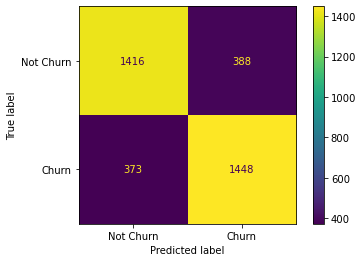



Random Forest


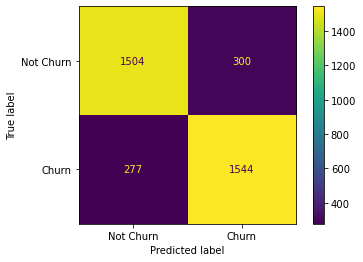



KNN


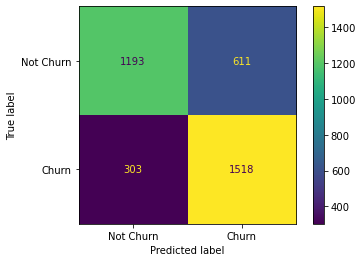



SVM


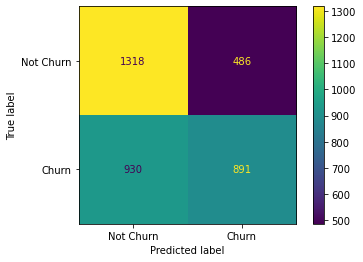



XGB


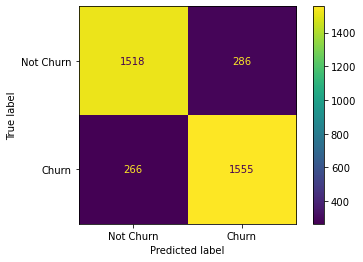

In [71]:
#Plotting Confusion Matrix for all models
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']
dd = [dt_mod3, rf_mod3, knn_mod3, svm_mod3, xgb_mod3]

print('Confusion Matrix for all models')

for i,j in zip(dd, mm):
    print('\n','========================================', '\n')
    print(j)
    plot_confusion_matrix(i, X_test_ad, y_test_ad, display_labels= ['Not Churn', 'Churn'])   
    plt.show()

In [72]:
#Classification Report for all models
cc = [y_pred_dt3, y_pred_rf3, y_pred_knn3, y_pred_svm3, y_pred_xgb3]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

for i,j in zip(cc, mm):
    print('======================================================')
    print(j, '\n', classification_report(y_test_ad, i))
    print('======================================================', '\n')

Decision Tree 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1804
           1       0.79      0.80      0.79      1821

    accuracy                           0.79      3625
   macro avg       0.79      0.79      0.79      3625
weighted avg       0.79      0.79      0.79      3625


Random Forest 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1804
           1       0.84      0.85      0.84      1821

    accuracy                           0.84      3625
   macro avg       0.84      0.84      0.84      3625
weighted avg       0.84      0.84      0.84      3625


KNN 
               precision    recall  f1-score   support

           0       0.80      0.66      0.72      1804
           1       0.71      0.83      0.77      1821

    accuracy                           0.75      3625
   macro avg       0.76      0.75      0.75      3625
weighted avg       0.76      0.75 

In [73]:
#Comparing the models imbalance & model smote_balance data with balanced accuracy score
mod_comp = pd.DataFrame(index=mm, columns=['Model1', 'Model2'], data={'Model1': [balanced_accuracy_score(y_test ,y_pred_dt).round(2), balanced_accuracy_score(y_test ,y_pred_rf).round(2), balanced_accuracy_score(y_test ,y_pred_knn).round(2), balanced_accuracy_score(y_test ,y_pred_svm).round(2), balanced_accuracy_score(y_test ,y_pred_xgb).round(2)], 
                                                                      'Model2': [balanced_accuracy_score(y_test_ad ,y_pred_dt3).round(2), balanced_accuracy_score(y_test_ad ,y_pred_rf3).round(2), balanced_accuracy_score(y_test_ad ,y_pred_knn3).round(2), balanced_accuracy_score(y_test_ad ,y_pred_svm3).round(2), balanced_accuracy_score(y_test_ad ,y_pred_xgb3).round(2)]
                                                                       })
mod_comp['%Change in Accuracy'] = mod_comp['Model2'] - mod_comp['Model1']
mod_comp.sort_values(by='Model2', ascending=False)

,Model1,Model2,%Change in Accuracy
XGB,0.70,0.85,0.15
Random Forest,0.69,0.84,0.15
Decision Tree,0.65,0.79,0.14
KNN,0.67,0.75,0.08
SVM,0.50,0.61,0.11


#### From above analysis,
* There's an improvement in minority class compared to smote technique, even though the accuracy remained the same more or less. 

### SMOTE + TOMEK
* This is a hybrid method which combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class (that is, samples of data from the majority class that is closest with the minority class data)

In [74]:
#Object Instantiation
st = SMOTETomek(random_state=0)

In [75]:
#Resampling the dataset with smote-tomek
X_st, y_st = st.fit_resample(X, y)

In [76]:
##Rechecking the count of target variable after smote-tomek
print('X_res after resampling shape : ' , X_st.shape)
print('y_res after resampling shape : ' , y_st.shape, '\n')
print(y_st.value_counts())

X_res after resampling shape :  (9494, 18)
y_res after resampling shape :  (9494, 1) 

Churn
0        4747
1        4747
dtype: int64


#### Building models with balanced data (SMOTE + TOMEK)

In [77]:
#Splitting data into training and testing dataset with 80:20 ratio
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st, y_st, random_state=0, test_size=0.35, stratify=y_st)

In [78]:
#Checking the size of features
X_train_st.shape, X_test_st.shape

((6171, 18), (3323, 18))

#### Model Building with default parameters & smote-tomek_resampled data

In [79]:
dt_mod4  = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
rf_mod4  = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=0)
knn_mod4 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
svm_mod4 = SVC(C=1.0, random_state=0)
xgb_mod4 = XGBClassifier(n_estimators=100, random_state=0)

#### Model Training

In [80]:
%%time
dt_mod4.fit(X_train_st, y_train_st)
rf_mod4.fit(X_train_st, y_train_st)
knn_mod4.fit(X_train_st, y_train_st)
svm_mod4.fit(X_train_st, y_train_st)
xgb_mod4.fit(X_train_st, y_train_st)

CPU times: total: 5.2 s
Wall time: 2.91 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Model Testing & Evaluation

In [81]:
%%time
y_pred_dt4  = dt_mod4.predict(X_test_st)
y_pred_rf4  = rf_mod4.predict(X_test_st)
y_pred_knn4 = knn_mod4.predict(X_test_st)
y_pred_svm4 = svm_mod4.predict(X_test_st)
y_pred_xgb4 = xgb_mod4.predict(X_test_st)

CPU times: total: 3.41 s
Wall time: 2.16 s


In [82]:
#Testing the roc-auc score for all models
cc = [y_pred_dt4, y_pred_rf4, y_pred_knn4, y_pred_svm4, y_pred_xgb4]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

print('ROC-AUC score for all models')

for i,j in zip(cc, mm):
    print('\n====================================')
    print(j, ':', roc_auc_score(y_test_st, i).round(2))
    print('====================================', '\n')

ROC-AUC score for all models

Decision Tree : 0.79


Random Forest : 0.85


KNN : 0.8


SVM : 0.67


XGB : 0.84



Confusion Matrix for all models


Decision Tree


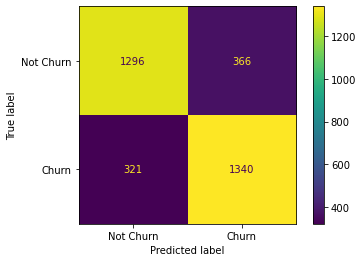



Random Forest


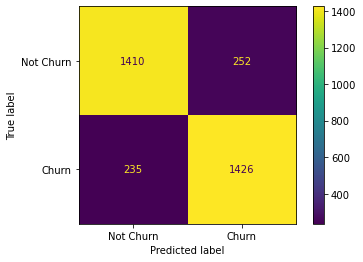



KNN


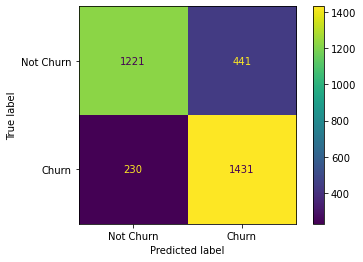



SVM


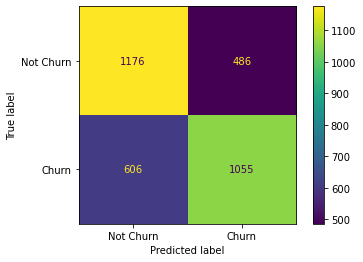



XGB


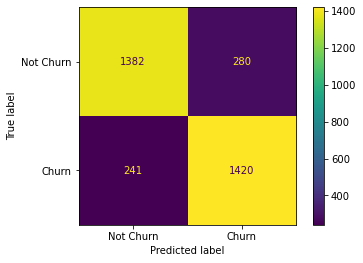

In [83]:
#Plotting Confusion Matrix for all models
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']
dd = [dt_mod4, rf_mod4, knn_mod4, svm_mod4, xgb_mod4]

print('Confusion Matrix for all models')

for i,j in zip(dd, mm):
    print('\n','========================================', '\n')
    print(j)
    plot_confusion_matrix(i, X_test_st, y_test_st, display_labels= ['Not Churn', 'Churn'])   
    plt.show()

In [84]:
#Classification Report for all models
cc = [y_pred_dt4, y_pred_rf4, y_pred_knn4, y_pred_svm4, y_pred_xgb4]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

for i,j in zip(cc, mm):
    print('======================================================')
    print(j, '\n', classification_report(y_test_st, i))
    print('======================================================', '\n')

Decision Tree 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1662
           1       0.79      0.81      0.80      1661

    accuracy                           0.79      3323
   macro avg       0.79      0.79      0.79      3323
weighted avg       0.79      0.79      0.79      3323


Random Forest 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1662
           1       0.85      0.86      0.85      1661

    accuracy                           0.85      3323
   macro avg       0.85      0.85      0.85      3323
weighted avg       0.85      0.85      0.85      3323


KNN 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1662
           1       0.76      0.86      0.81      1661

    accuracy                           0.80      3323
   macro avg       0.80      0.80      0.80      3323
weighted avg       0.80      0.80 

In [85]:
#Comparing the models imbalance & model smote_balance data with balanced accuracy score
mod_comp = pd.DataFrame(index=mm, columns=['Model1', 'Model2'], data={'Model1': [balanced_accuracy_score(y_test ,y_pred_dt).round(2), balanced_accuracy_score(y_test ,y_pred_rf).round(2), balanced_accuracy_score(y_test ,y_pred_knn).round(2), balanced_accuracy_score(y_test ,y_pred_svm).round(2), balanced_accuracy_score(y_test ,y_pred_xgb).round(2)], 
                                                                      'Model2': [balanced_accuracy_score(y_test_st ,y_pred_dt4).round(2), balanced_accuracy_score(y_test_st ,y_pred_rf4).round(2), balanced_accuracy_score(y_test_st ,y_pred_knn4).round(2), balanced_accuracy_score(y_test_st ,y_pred_svm4).round(2), balanced_accuracy_score(y_test_st ,y_pred_xgb4).round(2)]
                                                                       })
mod_comp['%Change in Accuracy'] = mod_comp['Model2'] - mod_comp['Model1']
mod_comp.sort_values(by='Model2', ascending=False)

,Model1,Model2,%Change in Accuracy
Random Forest,0.69,0.85,0.16
XGB,0.70,0.84,0.14
KNN,0.67,0.80,0.13
Decision Tree,0.65,0.79,0.14
SVM,0.50,0.67,0.17


#### From above analysis,
* We can see there's a big jump in recall class 1, for Random forest & XGB model have really outperformed compared to other models.
* Both, these models have managed to reduce the minority class misclassifications upto a good extent. 

### We build above models with all features taken into consideration to predict whether customer will churn or not. Let's try building models considering only significant features to predict the churned customer. 

## Feature Engineering
*To determine the important features for the model*
* Correlation Analysis
* Recursive Feature Elimination (RFE)
* Decision tree feature importance
* Select from Model (SFM)

### Correlation Analysis

In [86]:
#Correlation Analysis in tabular form
data1.corr().round(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.02,-0.01,0.00,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.01,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.29,-0.01,-0.15,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.03,0.05,0.15,0.09,0.08,0.13,0.05,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.01,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.68,0.00,-0.37,0.24,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.01,0.02,0.01,-0.02,0.06,0.00,0.02,-0.01,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.03,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.17,0.11,0.16,-0.17,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.05,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.05,-0.03,0.11,0.10,-0.14,0.08,-0.32,-0.17,-0.05
OnlineSecurity,-0.02,-0.13,0.15,0.15,0.33,-0.01,0.01,-0.03,1.00,0.18,0.17,0.28,0.04,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.18,1.00,0.19,0.19,0.15,0.28,-0.01,-0.13,0.12,0.38,-0.19


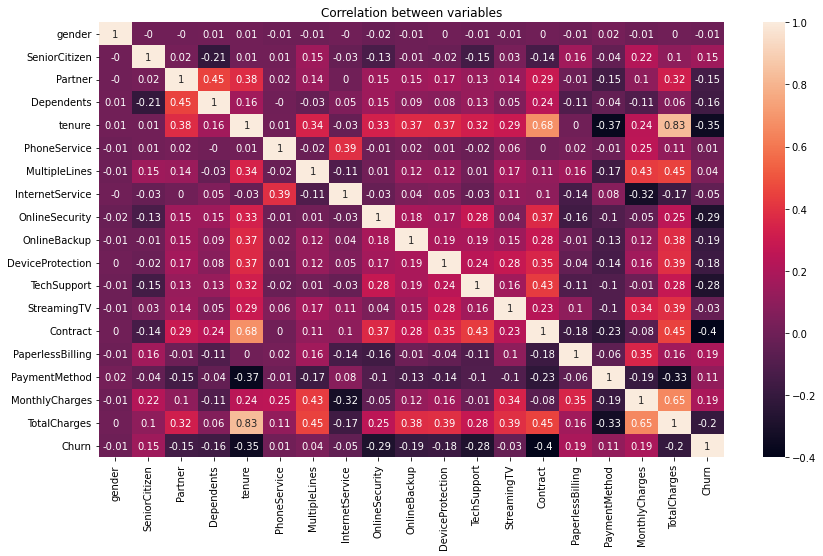

In [87]:
##Correlation Analysis in visual form
plt.figure(figsize=(14,8))
sns.heatmap(data1.corr().round(2), annot=True)
plt.title('Correlation between variables')
plt.show()

In [88]:
#Analysis of correlation between target & feature variables 
data1.corr()['Churn'].sort_values().round(2)

Contract           -0.40
tenure             -0.35
OnlineSecurity     -0.29
TechSupport        -0.28
TotalCharges       -0.20
OnlineBackup       -0.19
DeviceProtection   -0.18
Dependents         -0.16
Partner            -0.15
InternetService    -0.05
StreamingTV        -0.03
gender             -0.01
PhoneService        0.01
MultipleLines       0.04
PaymentMethod       0.11
SeniorCitizen       0.15
PaperlessBilling    0.19
MonthlyCharges      0.19
Churn               1.00
Name: Churn, dtype: float64

#### From correlational analysis,
* Streaming TV, gender, Phone-service, Multiple-lines, Payment method & Internet-service is having low-correlation w.r.t Churn.

* Contract, tenure, Online security, tech-support & total charges are top 5 features having high correlation w.r.t churn.

* Rest all features have a good correlation w.r.t Churn.

### Recursive Feature Elimination (RFE)

In [89]:
#Drawing Important features from Random Forest model using RFE
rfe_rf  = RFE(rf_mod4, n_features_to_select=12)

In [90]:
rfe_rf.fit(X_st, y_st)

RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=12)

In [91]:
#Important features as per random forest model
rfe_rf.get_feature_names_out(data.columns[0:18])

array(['Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [92]:
#Drawing Important features from Extreme Gradient Boosting model using RFE
rfe_xgb = RFE(xgb_mod4, n_features_to_select=12)

In [93]:
rfe_xgb.fit(X_st, y_st)

RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=1, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None, gamma=0,
                            gpu_id=-1, grow_policy='depthwise',
                            importance_type=None, interaction_constraints='',
                            learning_rate=0.300000012, max_bin=256,
                            max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                            max_leaves=0, min_child_weight=1, missing=nan,
                            monotone_constraints='()', n_estimators=100,
                            n_jobs=0, num_parallel_tree=1, predictor='auto',
                            random_state=0, reg_alpha=0, reg_lambda=1, ...),
    n_features_to_select=12)

In [94]:
#Important features as per extreme gradient boost model
rfe_xgb.get_feature_names_out(data.columns[0:18])

array(['gender', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'Contract', 'PaymentMethod'],
      dtype=object)

In [95]:
data.columns[0:18]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [96]:
#Comparing all the features from 3 models in a DataFrame
rfe_df = pd.DataFrame({'Random Forest' : rfe_rf.get_feature_names_out(data.columns[0:18]),
                       'Extreme Gradient Boost' : rfe_xgb.get_feature_names_out(data.columns[0:18])})
rfe_df

,Random Forest,Extreme Gradient Boost
0,Partner,gender
1,Dependents,Partner
2,tenure,Dependents
3,InternetService,tenure
4,OnlineSecurity,InternetService
5,OnlineBackup,OnlineSecurity
6,DeviceProtection,OnlineBackup
7,TechSupport,DeviceProtection
8,Contract,TechSupport
9,PaymentMethod,StreamingTV


#### From above RFE analysis,
* 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',  'DeviceProtection', 'TechSupport', 'Contract' & 'PaymentMethod' are common significant features for Random Forest & Extreme Gradient models.

### Decision Tree Feature Importance

In [97]:
#Drawing Important features from Decision tree model
dt_feat = dt_mod4.feature_importances_

In [98]:
dfi = pd.DataFrame({'Features' :  data1.columns[0:18], 
                    'Values'   :  dt_feat})
dfi.sort_values(by = 'Values', ascending = False, ignore_index = True)

,Features,Values
0,Contract,0.310224
1,MonthlyCharges,0.175067
2,TotalCharges,0.133983
3,tenure,0.089753
4,TechSupport,0.045298
5,OnlineSecurity,0.037283
6,PaymentMethod,0.036028
7,gender,0.023224
8,OnlineBackup,0.021580
9,Dependents,0.020761


#### From above analysis,
* Contract, Total-charges & Monthly-charges are the significant features as per decision tree feature importance.

### Select from Model (SFM)

In [99]:
#Choosing a model
rf1 = RandomForestClassifier(random_state=0)

In [100]:
#Drawing Important features from Select from model method
sfm = SelectFromModel(rf1, max_features=None)

In [101]:
sfm.fit(X_st, y_st)

SelectFromModel(estimator=RandomForestClassifier(random_state=0))

In [102]:
sfm.get_feature_names_out(input_features=data.columns[0:18])

array(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

#### From above analysis,
* 'tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges', and 'TotalCharges' are the important features for random forest model as per SFM method.

In [103]:
#Choosing a model
xgb1 = XGBClassifier(random_state=0)

In [104]:
#Drawing Important features from Select from model method
sfm = SelectFromModel(xgb1, max_features=None)

In [105]:
sfm.fit(X_st, y_st)

SelectFromModel(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, gamma=None,
                                        gpu_id=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        n_estimators=100, n_jobs=None,
                                        num_parallel_tree=None, predictor=None,
                                        random_state=0, reg_alpha=None,
                                        reg_lambda=None, ...))

In [106]:
sfm.get_feature_names_out(input_features=data.columns[0:18])

array(['InternetService', 'OnlineSecurity', 'Contract'], dtype=object)

#### From above analysis,
* 'InternetService', 'OnlineSecurity', 'Contract' are the important features for Extreme Gradient model as per SFM method.

### Note: Feature Engineering
* We can include 9 features, collectively from from RFE, decision tree importance, correlational analysis and SFM methods.
* Features viz 'Contract', 'InternetService', 'MultipleLines', 'TotalCharges', 'tenure', OnineBackup', 'TechSupport', 'DeviceProtection', 'PhoneService'.


* Let's try building model based on above features & analyse the model performance & accuracy.

## Building Model based on 9 significant features & smote-tomek balanced sampled data

In [107]:
data2 = pd.DataFrame(data = X_train_st, columns = data1.columns[0:18])
data3 = pd.DataFrame(data = X_test_st, columns = data1.columns[0:18])

In [108]:
#Selecting only 9 significant features for training
X_train_fi = data2.loc[:, ['Contract', 'InternetService', 'MultipleLines', 'TotalCharges',
       'tenure', 'OnlineBackup', 'TechSupport', 'DeviceProtection',
       'PhoneService']]

In [109]:
#Selecting only 9 significant features for tetsing
X_test_fi = data3.loc[:, ['Contract', 'InternetService', 'MultipleLines', 'TotalCharges',
       'tenure', 'OnlineBackup', 'TechSupport', 'DeviceProtection',
       'PhoneService']]

In [110]:
#Size of train data
X_train_fi.shape, y_train_st.shape

((6171, 9), (6171, 1))

In [111]:
#Size of test data
X_test_fi.shape, y_test_st.shape

((3323, 9), (3323, 1))

In [112]:
dt_mod6  = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
rf_mod6  = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=0)
knn_mod6 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
svm_mod6 = SVC(C=1.0, random_state=0)
xgb_mod6 = XGBClassifier(n_estimators=100, random_state=0)

### Model Training

In [113]:
%%time
dt_mod6.fit(X_train_fi, y_train_st)
rf_mod6.fit(X_train_fi, y_train_st)
knn_mod6.fit(X_train_fi, y_train_st)
svm_mod6.fit(X_train_fi, y_train_st)
xgb_mod6.fit(X_train_fi, y_train_st)

CPU times: total: 4.66 s
Wall time: 2.67 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model Testing & Evaluation

In [114]:
%%time
y_pred_dt6  = dt_mod6.predict(X_test_fi)
y_pred_rf6  = rf_mod6.predict(X_test_fi)
y_pred_knn6 = knn_mod6.predict(X_test_fi)
y_pred_svm6 = svm_mod6.predict(X_test_fi)
y_pred_xgb6 = xgb_mod6.predict(X_test_fi)

CPU times: total: 2.16 s
Wall time: 1.91 s


In [115]:
#Testing the roc-auc score for all models
cc = [y_pred_dt6, y_pred_rf6, y_pred_knn6, y_pred_svm6, y_pred_xgb6]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

print('ROC-AUC score for all models')

for i,j in zip(cc, mm):
    print('\n====================================')
    print(j, ':', roc_auc_score(y_test_st, i).round(2))
    print('====================================', '\n')

ROC-AUC score for all models

Decision Tree : 0.8


Random Forest : 0.84


KNN : 0.79


SVM : 0.63


XGB : 0.85



Confusion Matrix for all models


Decision Tree


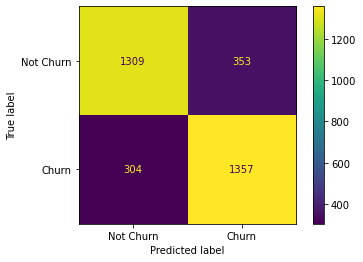



Random Forest


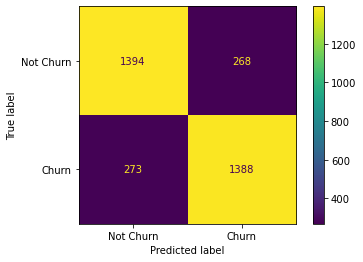



KNN


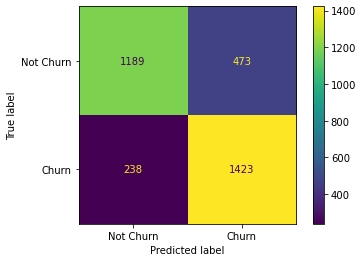



SVM


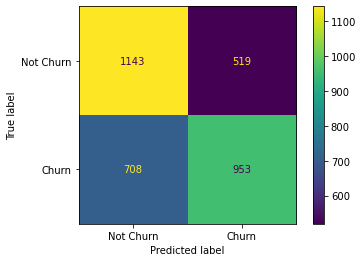



XGB


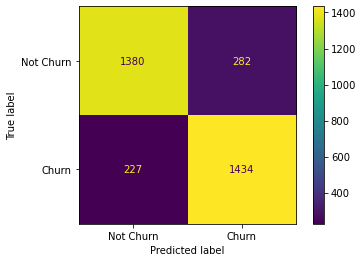

In [116]:
#Plotting Confusion Matrix for all models
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']
dd = [dt_mod6, rf_mod6, knn_mod6, svm_mod6, xgb_mod6]

print('Confusion Matrix for all models')

for i,j in zip(dd, mm):
    print('\n','========================================', '\n')
    print(j)
    plot_confusion_matrix(i, X_test_fi, y_test_st, display_labels= ['Not Churn', 'Churn'])   
    plt.show()

In [117]:
#Classification Report for all models
cc = [y_pred_dt6, y_pred_rf6, y_pred_knn6, y_pred_svm6, y_pred_xgb6]
mm = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGB']

for i,j in zip(cc, mm):
    print('======================================================')
    print(j, '\n', classification_report(y_test_st, i))
    print('======================================================', '\n')

Decision Tree 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1662
           1       0.79      0.82      0.81      1661

    accuracy                           0.80      3323
   macro avg       0.80      0.80      0.80      3323
weighted avg       0.80      0.80      0.80      3323


Random Forest 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1662
           1       0.84      0.84      0.84      1661

    accuracy                           0.84      3323
   macro avg       0.84      0.84      0.84      3323
weighted avg       0.84      0.84      0.84      3323


KNN 
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1662
           1       0.75      0.86      0.80      1661

    accuracy                           0.79      3323
   macro avg       0.79      0.79      0.78      3323
weighted avg       0.79      0.79 

In [118]:
#Comparing the models imbalance & model smote_balance data with balanced accuracy score
mod_comp = pd.DataFrame(index=mm, columns=['All 18 Feat.', '10 Feat.'], data={'All 18 Feat.': [balanced_accuracy_score(y_test_st ,y_pred_dt4).round(4), balanced_accuracy_score(y_test_st ,y_pred_rf4).round(4), balanced_accuracy_score(y_test_st ,y_pred_knn4).round(4), balanced_accuracy_score(y_test_st ,y_pred_svm4).round(4), balanced_accuracy_score(y_test_st ,y_pred_xgb4).round(4)], 
                                                                      '10 Feat.': [balanced_accuracy_score(y_test_st ,y_pred_dt6).round(4), balanced_accuracy_score(y_test_st ,y_pred_rf6).round(4), balanced_accuracy_score(y_test_st ,y_pred_knn6).round(4), balanced_accuracy_score(y_test_st ,y_pred_svm6).round(4), balanced_accuracy_score(y_test_st ,y_pred_xgb6).round(4)]
                                                                       })
mod_comp['%Change in Accuracy'] = mod_comp['10 Feat.'] - mod_comp['All 18 Feat.']

mod_comp.sort_values(by = '10 Feat.', ascending = False)

,All 18 Feat.,10 Feat.,%Change in Accuracy
XGB,0.8432,0.8468,0.0036
Random Forest,0.8534,0.8372,-0.0162
Decision Tree,0.7933,0.8023,0.0090
KNN,0.7981,0.7861,-0.0120
SVM,0.6714,0.6307,-0.0407


#### From above analysis,
* We can finalise Extreme Gradient boost model for our dataset Churn prediction. It has really done a good job in minimising the minority class (False negatives in our case) & improved a lot on recall score as well.
* We will try to further enhance the performance with the help of hyper-parameter tuning for our model. 

### Hyper-Parameter Tuning

In [119]:
Xx = pd.concat([X_train_fi, X_test_fi])

In [120]:
Xx.shape

(9494, 9)

In [121]:
XGBClassifier(random_state=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=0,
              reg_alpha=None, reg_lambda=None, ...)

In [122]:
%%time

ml = XGBClassifier(random_state=0)


params = {'n_estimators'      : [125, 150, 175, 200], 
          'max_depth'         : [5, 8, 9, 12],
          'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
          'scale_pos_weight'  : [1, 99, 100],
          'colsample_bylevel' : [0.5, 0.8, 0.9],
          'base_score'        : [0.25, 0.5, 0.75]}



rr = RandomizedSearchCV(estimator=ml, n_iter=15, random_state=0, n_jobs=-1, cv=10, 
                        param_distributions=params)


rr.fit(X_st, y_st)


print(rr.best_params_)
print('\n',rr.best_score_,'\n')

{'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bylevel': 0.9, 'base_score': 0.75}

 0.8548899118185348 

CPU times: total: 12.9 s
Wall time: 1min 48s


#### The above score & parameters is the best performance/score of our model after tuning the hyper-parameters.

## Summarizing the model performance & stability

In [123]:
X_md = pd.concat([X_train_fi, X_test_fi])

In [124]:
y_md = pd.concat([y_train_st, y_test_st])

In [125]:
sk_mod = StratifiedKFold(n_splits=20, shuffle=True, random_state=0)

In [126]:
xgb2 = XGBClassifier(scale_pos_weight= 1, n_estimators= 200, max_depth= 8, learning_rate= 0.1,
                     colsample_bylevel= 0.9, base_score= 0.75)

In [127]:
%%time
score = cross_val_score(xgb2, X_md, y_md, cv=sk_mod, n_jobs=-1)
score

CPU times: total: 172 ms
Wall time: 10.6 s


array([0.86105263, 0.86315789, 0.86947368, 0.87578947, 0.85684211,
       0.83789474, 0.86526316, 0.88210526, 0.83157895, 0.83789474,
       0.82947368, 0.85684211, 0.83578947, 0.85473684, 0.8649789 ,
       0.82911392, 0.82489451, 0.88396624, 0.85443038, 0.8649789 ])

In [128]:
score.mean().round(2)

0.85

In [129]:
score.std().round(2)

0.02

#### Note:
* So, to summarize our model performance & stability we performed Stratified K-Fold on our data.
* It is found that our model can give an average score of 85% with standard deviation of 2%. 

## Making Pipeline

### Building Pipeline for model

In [130]:
#Selecting the significant features
X_train_fi.columns

Index(['Contract', 'InternetService', 'MultipleLines', 'TotalCharges',
       'tenure', 'OnlineBackup', 'TechSupport', 'DeviceProtection',
       'PhoneService'],
      dtype='object')

In [131]:
#Using the mapper to perform specific transformer to the features
m = DataFrameMapper([(['Contract', LabelEncoder()]), (['InternetService', LabelEncoder()]), (['MultipleLines', LabelEncoder()]),
                     (['TotalCharges', None]), (['tenure', None]), (['OnlineBackup', LabelEncoder()]),
                     (['TechSupport', LabelEncoder()]), (['DeviceProtection', LabelEncoder()]),
                     (['PhoneService', LabelEncoder()])])

In [132]:
#Making the pipeline stepwise
model = Pipeline(steps=[('mapper', m), ('sampling', SMOTETomek(random_state=0)),
                        ('model', XGBClassifier(n_estimators=200, max_depth=7, colsample_bylevel= 1,
                        scale_pos_weight= 3.5, learning_rate=0.12, base_score=0.75, random_state=0))])
model

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['Contract', LabelEncoder()],
                                           ['InternetService', LabelEncoder()],
                                           ['MultipleLines', LabelEncoder()],
                                           ['TotalCharges', None],
                                           ['tenure', None],
                                           ['OnlineBackup', LabelEncoder()],
                                           ['TechSupport', LabelEncoder()],
                                           ['DeviceProtection', LabelEncoder()],
                                           ['PhoneService', LabelEncoder()]])),
                ('sampling', SMOTE...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.12,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=0, reg_alpha=None, reg_lambda=None, ...))])

### User Testing & Evaluation

In [133]:
#Considering the original data
uid = data.loc[:, ['Contract', 'InternetService', 'MultipleLines', 'TotalCharges',
       'tenure', 'OnlineBackup', 'TechSupport', 'DeviceProtection',
       'PhoneService', 'Churn']]
uid

,Contract,InternetService,MultipleLines,TotalCharges,tenure,OnlineBackup,TechSupport,DeviceProtection,PhoneService,Churn
0,Month-to-month,DSL,No phone service,29.85,1,Yes,No,No,No,No
1,One year,DSL,No,1889.50,34,No,No,Yes,Yes,No
2,Month-to-month,DSL,No,108.15,2,Yes,No,No,Yes,Yes
3,One year,DSL,No phone service,1840.75,45,No,Yes,Yes,No,No
4,Month-to-month,Fiber optic,No,151.65,2,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,One year,DSL,Yes,1990.50,24,No,Yes,Yes,Yes,No
7039,One year,Fiber optic,Yes,7362.90,72,Yes,No,Yes,Yes,No
7040,Month-to-month,DSL,No phone service,346.45,11,No,No,No,No,No
7041,Month-to-month,Fiber optic,Yes,306.60,4,No,No,No,Yes,Yes


In [134]:
uid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7010 non-null   object 
 1   InternetService   7010 non-null   object 
 2   MultipleLines     7010 non-null   object 
 3   TotalCharges      7010 non-null   float64
 4   tenure            7010 non-null   int64  
 5   OnlineBackup      7010 non-null   object 
 6   TechSupport       7010 non-null   object 
 7   DeviceProtection  7010 non-null   object 
 8   PhoneService      7010 non-null   object 
 9   Churn             7010 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 860.5+ KB


In [135]:
#Picking up 10 random samples from our original data (7,12)
ref = uid.sample(n=20, random_state=7)
ref

,Contract,InternetService,MultipleLines,TotalCharges,tenure,OnlineBackup,TechSupport,DeviceProtection,PhoneService,Churn
2146,One year,Fiber optic,Yes,7133.45,62,Yes,Yes,Yes,Yes,No
4614,Month-to-month,No,No,144.35,7,No internet service,No internet service,No internet service,Yes,No
3968,Two year,No,No,1423.65,72,No internet service,No internet service,No internet service,Yes,No
832,One year,DSL,No,5222.30,70,Yes,Yes,Yes,Yes,No
4219,One year,Fiber optic,No,3772.65,48,Yes,No,No,Yes,No
131,Month-to-month,DSL,No phone service,1502.65,25,Yes,No,Yes,No,Yes
5296,One year,DSL,No phone service,2258.25,57,No,Yes,Yes,No,No
2151,Two year,No,Yes,1498.85,68,No internet service,No internet service,No internet service,Yes,No
5153,Month-to-month,Fiber optic,No,3851.45,41,Yes,No,No,Yes,No
5979,Two year,No,No,978.00,53,No internet service,No internet service,No internet service,Yes,No


In [136]:
#Splititing the collected samples for testing 
uid_Xtest = ref.iloc[:, :-1]
uid_ytest = ref[['Churn']]

In [137]:
xx = LabelEncoder()
uid_ytest = xx.fit_transform(uid_ytest)

In [138]:
uid_ytest

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [139]:
data_n = uid.copy()
data_n.shape

(7010, 10)

In [140]:
#Dropping the collected samples from original dataset so that model is not trained on it
data_n.drop(index=ref.index, inplace=True)

In [141]:
#Reset the index after dropping the samples
data_n.reset_index(drop='index', inplace=True)

In [142]:
data_n.shape

(6990, 10)

In [143]:
#Splitting the original data for training the model
X_t = data_n.iloc[:, :-1]
y_t = data_n[['Churn']]

In [144]:
yy = LabelEncoder()
y_t = yy.fit_transform(y_t)

In [145]:
y_t

array([0, 0, 1, ..., 0, 1, 0])

In [146]:
#Training the model
model.fit(X=X_t, y=y_t)

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['Contract', LabelEncoder()],
                                           ['InternetService', LabelEncoder()],
                                           ['MultipleLines', LabelEncoder()],
                                           ['TotalCharges', None],
                                           ['tenure', None],
                                           ['OnlineBackup', LabelEncoder()],
                                           ['TechSupport', LabelEncoder()],
                                           ['DeviceProtection', LabelEncoder()],
                                           ['PhoneService', LabelEncoder()]])),
                ('sampling', SMOTE...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.12, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=200, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [147]:
#Model Testing & Evaluation

print('Actual: ', np.array(uid_ytest).flatten(), '\n')

print('Predict:', model.predict(uid_Xtest))

Actual:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1] 

Predict: [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1]


In [148]:
pred = model.predict(uid_Xtest)

In [149]:
model.score(uid_Xtest, uid_ytest).round(2)

0.85

In [150]:
recall_score(uid_ytest, pred).round(2)

1.0

## Saving the model 

In [151]:
#Saving the model to file
dump(model, open('Tchurn_intelligence.pkl', 'wb'))

In [154]:
#Loading the file
ml = load(open('Tchurn_intelligence.pkl', 'rb'))

In [155]:
#Running the file for testing & evaluating 
print('Predicted Values:', ml.predict(uid_Xtest))

Predicted Values: [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1]


### Final Note:
* Further deployment of the model is made using streamlit for better user-interface testing.

#                                     Thank you!! 

# ================================================